### 1. Problem statement: 
### Based on data each person has taken loan from a bank and from the attribute default (yes or no) we can see who has defaulted on their loan 

### 2.Dependent variable is default(Classification) so the approach should be classification

### 3.Data
#### checking_balance - status of existing checking acount DM(Debit Memorandum - value of funds decreased for correction)
#### months_loan_duration
#### Credit_history
#### purpose
#### amount - credit amount
#### Savings_balance(in DM)
#### employement duration
#### percent_of_income - installment rate in percentage of income
#### years_at_residence - current residence duration
#### age
#### other_credit - other installments
#### housing - rent or own or free
#### existing_loans_count
#### job
#### phone - registered or not(yes or no)
#### default - yes or no

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
df=pd.read_csv(r"C:\Users\51606\Downloads\credit.csv")

### Data Exploration

In [4]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [5]:
df.shape

(1000, 17)

In [6]:
df.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object

In [7]:
df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

### Data Visualization

<AxesSubplot:xlabel='default', ylabel='count'>

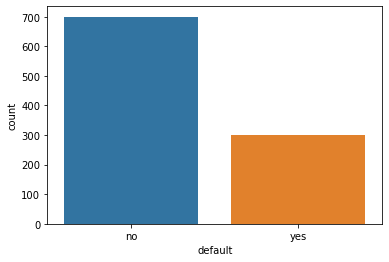

In [8]:
sns.countplot(x="default",data=df)

In [9]:
df["default"].value_counts()

no     700
yes    300
Name: default, dtype: int64

### 300 people have defaulted on their loans out of 1000

<AxesSubplot:xlabel='savings_balance', ylabel='count'>

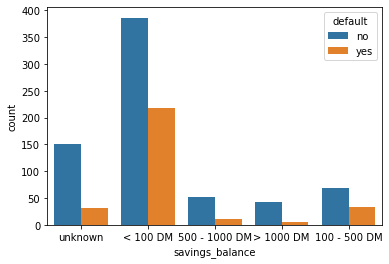

In [10]:
sns.countplot(x="savings_balance",hue="default",data=df)

### Most people who took loan have less than 100 DM in savings balance

<AxesSubplot:xlabel='purpose', ylabel='count'>

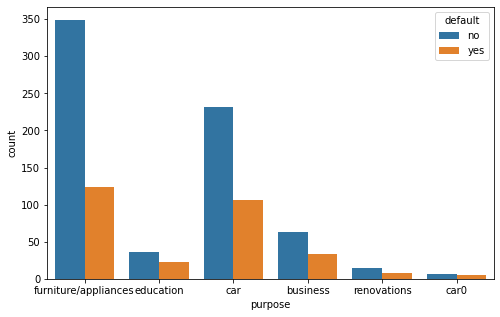

In [11]:
fig, ax=plt.subplots(figsize=(8,5))
sns.countplot(x="purpose",hue="default",data=df)

### Most of the people have taken loan for furniture/appliances and car 

<AxesSubplot:xlabel='job', ylabel='count'>

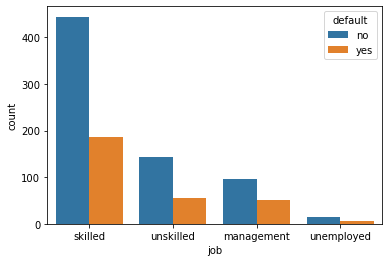

In [12]:
sns.countplot(x="job",hue="default",data=df)

### skilled people have taken more loans compared to other job people

<AxesSubplot:xlabel='housing', ylabel='count'>

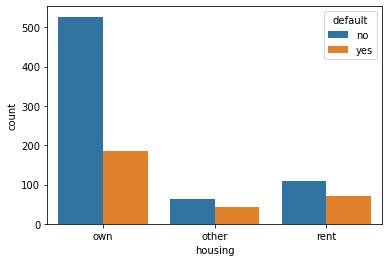

In [13]:
sns.countplot(x="housing",hue="default",data=df)

In [14]:
pd.crosstab(df["housing"],df["default"])

default,no,yes
housing,,
other,64,44
own,527,186
rent,109,70


### People who have their own house have less defaults compared to people who pay rent or other housing

<AxesSubplot:xlabel='default', ylabel='count'>

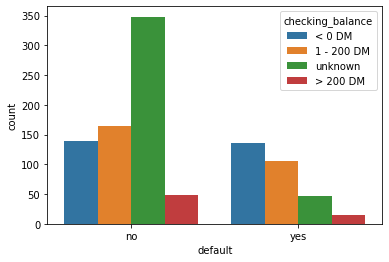

In [15]:
sns.countplot(x="default",hue="checking_balance",data=df)

In [16]:
pd.crosstab(df["default"],df["checking_balance"])

checking_balance,1 - 200 DM,< 0 DM,> 200 DM,unknown
default,,,,
no,164,139,49,348
yes,105,135,14,46


### people with >200 DM  in checking balance have taken less loans and unknown in checking_balance is more but the but people who have unknown have less defaults  

<AxesSubplot:xlabel='default', ylabel='months_loan_duration'>

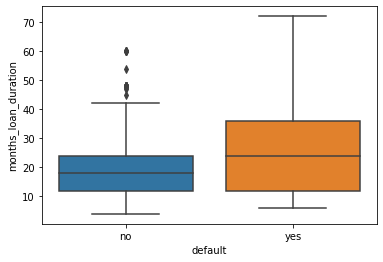

In [17]:
sns.boxplot(x="default",y="months_loan_duration",data=df)

### Most of the people have longer duration for loans have defaulted compared to people who have short term loan duration 

<AxesSubplot:xlabel='default', ylabel='amount'>

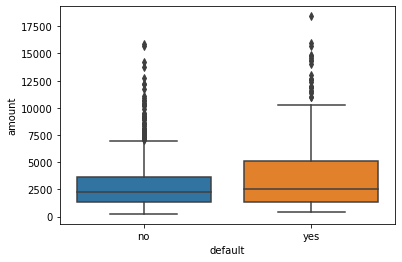

In [18]:
sns.boxplot(x="default",y="amount",data=df)

### Larger the amount taken for loan more the people have defaulted

<AxesSubplot:xlabel='housing', ylabel='amount'>

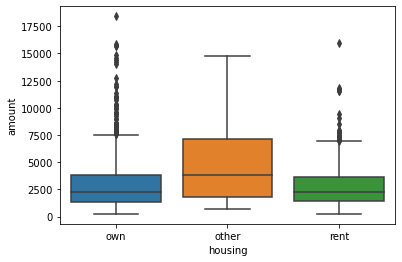

In [19]:
sns.boxplot(x="housing",y="amount",data=df)

### People with other housing have been given more credit amount compared to people who own or rent 

<AxesSubplot:xlabel='job', ylabel='amount'>

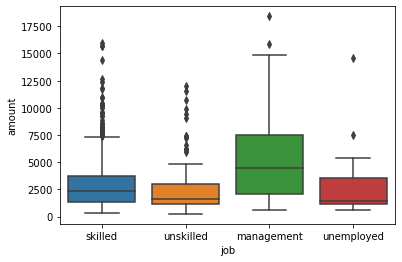

In [20]:
sns.boxplot(x="job",y="amount",data=df)

### People with management job have taken most credit amount compared to people with other jobs

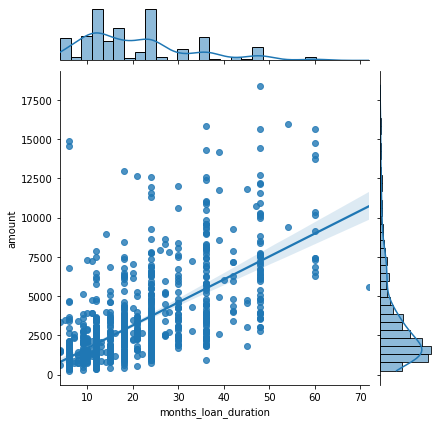

In [21]:
sns.jointplot(x="months_loan_duration",y="amount",data=df,kind="reg")

### months_loan_duration and amount have a positive co relation between them so months_loan_duration will increase along with amount

### hence months_loan_duration will be same as amount for job and housing 

<AxesSubplot:xlabel='credit_history', ylabel='amount'>

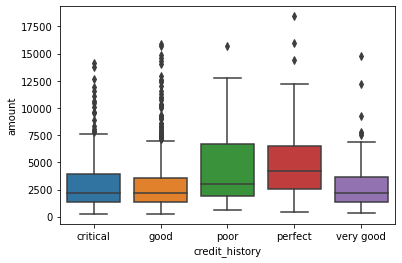

In [22]:
sns.boxplot(x="credit_history",y="amount",data=df)

### People with poor credit_history have been given more credit amount and then people with perfect have been given 2nd most credit amount 

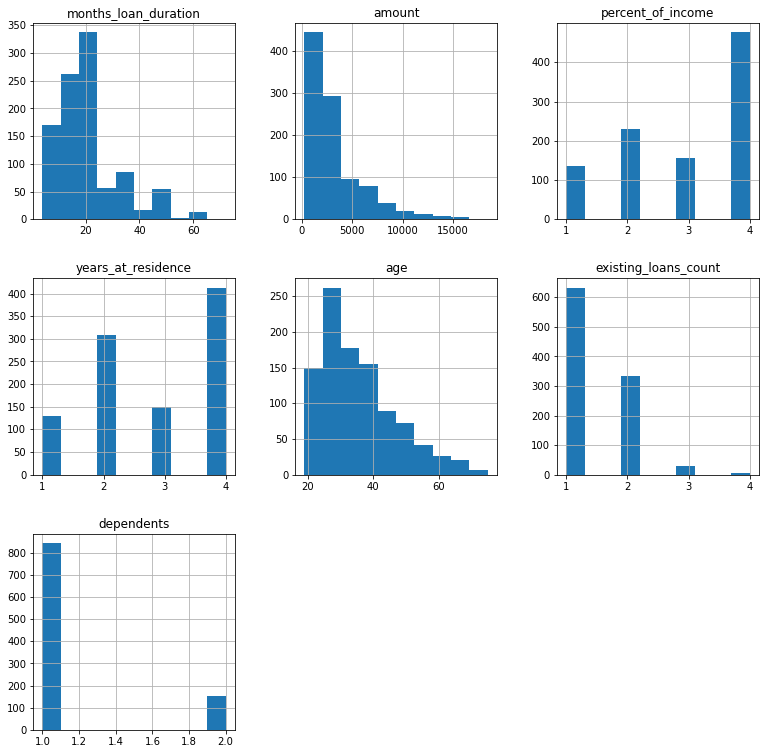

In [23]:
df.hist(figsize=(13,13))
plt.show()

In [24]:
df.shape

(1000, 17)

In [25]:
df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [26]:
df.describe(include="all")

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000
unique,4,NaN,5,6,NaN,5,5,NaN,NaN,NaN,3,3,NaN,4,NaN,2,2
top,unknown,NaN,good,furniture/appliances,NaN,< 100 DM,1 - 4 years,NaN,NaN,NaN,none,own,NaN,skilled,NaN,no,no
freq,394,NaN,530,473,NaN,603,339,NaN,NaN,NaN,814,713,NaN,630,NaN,596,700
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,2.845000,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,1.103718,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,1.000000,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,2.000000,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,3.000000,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,4.000000,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN


In [27]:
df.corr()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
months_loan_duration,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
percent_of_income,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
years_at_residence,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
existing_loans_count,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
dependents,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


In [28]:
duplicate=df.duplicated()
duplicate.sum()

0

In [29]:
df.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object

In [30]:
df=pd.get_dummies(columns=["checking_balance","credit_history","purpose","savings_balance","employment_duration","other_credit","housing","job","phone"],data=df)

In [31]:
df.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 DM,savings_balance_500 - 1000 DM,savings_balance_< 100 DM,savings_balance_> 1000 DM,savings_balance_unknown,employment_duration_1 - 4 years,employment_duration_4 - 7 years,employment_duration_< 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
0,6,1169,4,4,67,2,1,no,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
1,48,5951,2,2,22,1,1,yes,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
2,12,2096,2,3,49,1,2,no,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0
3,42,7882,2,4,45,1,2,no,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,yes,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0


In [32]:
x=df.drop("default",axis=1)

In [33]:
x.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 DM,savings_balance_500 - 1000 DM,savings_balance_< 100 DM,savings_balance_> 1000 DM,savings_balance_unknown,employment_duration_1 - 4 years,employment_duration_4 - 7 years,employment_duration_< 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
0,6,1169,4,4,67,2,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
1,48,5951,2,2,22,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
2,12,2096,2,3,49,1,2,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0
3,42,7882,2,4,45,1,2,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0


In [34]:
y=df["default"]

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [36]:
x_train.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 DM,savings_balance_500 - 1000 DM,savings_balance_< 100 DM,savings_balance_> 1000 DM,savings_balance_unknown,employment_duration_1 - 4 years,employment_duration_4 - 7 years,employment_duration_< 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
731,24,1987,2,4,21,1,2,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
716,30,3077,3,2,40,2,2,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
640,18,750,4,1,27,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0
804,12,7472,1,2,24,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0
737,18,4380,3,4,35,1,2,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1


### Logistic Regression

In [37]:
model_1=LogisticRegression()

In [38]:
model_1.fit(x_train,y_train)

LogisticRegression()

In [39]:
model_1.score(x_train,y_train)

0.7671428571428571

In [40]:
model_1.score(x_test,y_test)

0.7433333333333333

### Decision Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
model_2=DecisionTreeClassifier(max_depth=4)

In [43]:
model_2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [44]:
model_2.score(x_train,y_train)

0.7628571428571429

In [45]:
model_2.score(x_test,y_test)

0.73

### Bagging Classifier

In [46]:
from sklearn.ensemble import BaggingClassifier

In [47]:
model_3=BaggingClassifier(n_estimators=30,max_samples=35)

In [48]:
model_3.fit(x_train,y_train)

BaggingClassifier(max_samples=35, n_estimators=30)

In [49]:
model_3.score(x_train,y_train)

0.7642857142857142

In [50]:
model_3.score(x_test,y_test)

0.7366666666666667

### Boosting Classifier

### AdaBoost

In [51]:
from sklearn.ensemble import AdaBoostClassifier

In [52]:
model_4=AdaBoostClassifier(n_estimators=30,learning_rate=0.5)

In [53]:
model_4.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=30)

In [54]:
model_4.score(x_train,y_train)

0.7885714285714286

In [55]:
model_4.score(x_test,y_test)

0.74

### GradientBoosting

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
model_5=GradientBoostingClassifier(learning_rate=0.6,criterion='mae')

In [58]:
model_5.fit(x_train,y_train)

GradientBoostingClassifier(criterion='mae', learning_rate=0.6)

In [59]:
model_5.score(x_train,y_train)

0.7428571428571429

In [60]:
model_5.score(x_test,y_test)

0.73

### Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
model_6=RandomForestClassifier(n_estimators=50, max_depth=4)

In [63]:
model_6.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=50)

In [64]:
model_6.score(x_train,y_train)

0.7728571428571429

In [65]:
model_6.score(x_test,y_test)

0.7266666666666667

### Naive Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB

In [67]:
model_7=GaussianNB()

In [68]:
model_7.fit(x_train,y_train)

GaussianNB()

In [69]:
model_7.score(x_train,y_train)

0.7457142857142857

In [70]:
model_7.score(x_test,y_test)

0.71

### KNN Classifier

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
model_8=KNeighborsClassifier(n_neighbors=23)

In [73]:
model_8.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=23)

In [74]:
model_8.score(x_train,y_train)

0.7114285714285714

In [75]:
model_8.score(x_test,y_test)

0.7133333333333334

### SVC Classifier

In [76]:
from sklearn.svm import SVC

In [77]:
model_9=SVC(kernel='linear')

In [78]:
model_9.fit(x_train,y_train)

SVC(kernel='linear')

In [79]:
model_9.score(x_train,y_train)

0.76

In [80]:
model_9.score(x_test,y_test)

0.71

### Ada boost gave the best score (78,74)

### Standard Scaling

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler=StandardScaler().fit(x_train)

In [83]:
print(scaler)

StandardScaler()


In [84]:
scaler.transform(x_train)

array([[ 0.25913751, -0.44363756, -0.85267033, ...,  2.04577252,
         0.80681063, -0.80681063],
       [ 0.76208462, -0.05891106,  0.03420817, ..., -0.4888129 ,
        -1.23944822,  1.23944822],
       [-0.2438096 , -0.88024919,  0.92108667, ..., -0.4888129 ,
         0.80681063, -0.80681063],
       ...,
       [-0.49528316,  0.12356931, -1.73954882, ...,  2.04577252,
         0.80681063, -0.80681063],
       [ 0.25913751, -0.50152301,  0.92108667, ..., -0.4888129 ,
         0.80681063, -0.80681063],
       [-0.2438096 , -0.40375307,  0.92108667, ..., -0.4888129 ,
         0.80681063, -0.80681063]])

In [85]:
x_train_scaled=scaler.transform(x_train)

In [86]:
scaler=StandardScaler().fit(x_test)

In [87]:
print(scaler)

StandardScaler()


In [88]:
scaler.transform(x_test)

array([[-0.47749414,  1.25873482, -1.82574186, ..., -0.52592371,
        -1.15920231,  1.15920231],
       [ 1.22494675,  4.48424907, -0.91287093, ..., -0.52592371,
         0.86266219, -0.86266219],
       [-0.72069998, -0.20630113, -0.91287093, ..., -0.52592371,
         0.86266219, -0.86266219],
       ...,
       [-0.47749414, -0.64391392,  0.91287093, ..., -0.52592371,
        -1.15920231,  1.15920231],
       [ 0.25212339,  0.1514527 , -1.82574186, ..., -0.52592371,
         0.86266219, -0.86266219],
       [-0.96390582, -0.78751681,  0.91287093, ..., -0.52592371,
         0.86266219, -0.86266219]])

In [89]:
x_test_scaled=scaler.transform(x_test)

In [90]:
model_11=LogisticRegression()

In [91]:
model_11.fit(x_train_scaled,y_train)

LogisticRegression()

In [92]:
model_11.score(x_train_scaled,y_train)

0.7828571428571428

In [93]:
model_11.score(x_test_scaled,y_test)

0.75

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
model_12=DecisionTreeClassifier(max_depth=4)

In [96]:
model_12.fit(x_train_scaled,y_train)

DecisionTreeClassifier(max_depth=4)

In [97]:
model_12.score(x_train_scaled,y_train)

0.7628571428571429

In [98]:
model_12.score(x_test_scaled,y_test)

0.73

In [99]:
from sklearn.ensemble import BaggingClassifier

In [100]:
model_13=BaggingClassifier(n_estimators=30,max_samples=35)

In [101]:
model_13.fit(x_train_scaled,y_train)

BaggingClassifier(max_samples=35, n_estimators=30)

In [102]:
model_13.score(x_train_scaled,y_train)

0.7642857142857142

In [103]:
model_13.score(x_test_scaled,y_test)

0.72

In [104]:
from sklearn.ensemble import AdaBoostClassifier

In [105]:
model_14=AdaBoostClassifier(n_estimators=20,learning_rate=.7)

In [106]:
model_14.fit(x_train_scaled,y_train)

AdaBoostClassifier(learning_rate=0.7, n_estimators=20)

In [107]:
model_14.score(x_train_scaled,y_train)

0.78

In [108]:
model_14.score(x_test_scaled,y_test)

0.75

In [109]:
from sklearn.ensemble import GradientBoostingClassifier

In [110]:
model_15=GradientBoostingClassifier(learning_rate=0.8,criterion='mae')

In [111]:
model_15.fit(x_train_scaled,y_train)

GradientBoostingClassifier(criterion='mae', learning_rate=0.8)

In [112]:
model_15.score(x_train_scaled,y_train)

0.7428571428571429

In [113]:
model_15.score(x_test_scaled,y_test)

0.7233333333333334

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
model_16=RandomForestClassifier(n_estimators=50, max_depth=4)

In [116]:
model_16.fit(x_train_scaled,y_train)

RandomForestClassifier(max_depth=4, n_estimators=50)

In [117]:
model_16.score(x_train_scaled,y_train)

0.7657142857142857

In [118]:
model_16.score(x_test_scaled,y_test)

0.7233333333333334

In [119]:
from sklearn.naive_bayes import GaussianNB

In [120]:
model_17=GaussianNB()

In [121]:
model_17.fit(x_train_scaled,y_train)

GaussianNB()

In [122]:
model_17.score(x_train_scaled,y_train)

0.7342857142857143

In [123]:
model_17.score(x_test_scaled,y_test)

0.7033333333333334

In [124]:
from sklearn.neighbors import KNeighborsClassifier

In [125]:
model_18=KNeighborsClassifier(n_neighbors=23)

In [126]:
model_18.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=23)

In [127]:
model_18.score(x_train_scaled,y_train)

0.73

In [128]:
model_18.score(x_test_scaled,y_test)

0.7266666666666667

In [129]:
from sklearn.svm import SVC

In [130]:
model_19=SVC(kernel="linear")

In [131]:
model_19.fit(x_train_scaled,y_train)

SVC(kernel='linear')

In [132]:
model_19.score(x_train_scaled,y_train)

0.7771428571428571

In [133]:
model_19.score(x_test_scaled,y_test)

0.7466666666666667

### After Standard Scaling Logistic Regression gave best score (78,75)

In [138]:
from sklearn.preprocessing import MinMaxScaler

In [140]:
scaler1=MinMaxScaler().fit(x_train)

In [142]:
print(scaler1)

MinMaxScaler()


In [146]:
scaler1.transform(x_train)

array([[0.35714286, 0.0955761 , 0.33333333, ..., 1.        , 1.        ,
        0.        ],
       [0.46428571, 0.15555189, 0.66666667, ..., 0.        , 0.        ,
        1.        ],
       [0.25      , 0.02751183, 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.19642857, 0.18399912, 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.35714286, 0.08655222, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.25      , 0.10179377, 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [147]:
x_train_scaled1=scaler1.transform(x_train)

In [148]:
scaler1=MinMaxScaler().fit(x_test)

In [149]:
print(scaler1)

MinMaxScaler()


In [151]:
scaler1.transform(x_test)

array([[0.16176471, 0.42192414, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.47058824, 1.        , 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.11764706, 0.15936076, 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.16176471, 0.0809319 , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.29411765, 0.22347731, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.07352941, 0.05519543, 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [152]:
x_test_scaled1=scaler1.transform(x_test)

In [153]:
model_20=LogisticRegression()

In [154]:
model_20.fit(x_train_scaled1,y_train)

LogisticRegression()

In [155]:
model_20.score(x_train_scaled1,y_train)

0.7742857142857142

In [157]:
model_20.score(x_test_scaled1,y_test)

0.74

In [158]:
from sklearn.tree import DecisionTreeClassifier

In [163]:
model_21=DecisionTreeClassifier(max_depth=4)

In [164]:
model_21.fit(x_train_scaled1,y_train)

DecisionTreeClassifier(max_depth=4)

In [165]:
model_21.score(x_train_scaled1,y_train)

0.7628571428571429

In [166]:
model_21.score(x_test_scaled1,y_test)

0.75

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [199]:
model_23=BaggingClassifier(n_estimators=40,max_samples=45)

In [200]:
model_23.fit(x_train_scaled1,y_train)

BaggingClassifier(max_samples=45, n_estimators=40)

In [201]:
model_23.score(x_train_scaled1,y_train)

0.7642857142857142

In [202]:
model_23.score(x_test_scaled1,y_test)

0.7333333333333333

In [203]:
from sklearn.ensemble import AdaBoostClassifier

In [245]:
model_24=AdaBoostClassifier(n_estimators=30,learning_rate=.8)

In [246]:
model_24.fit(x_train_scaled1,y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=30)

In [247]:
model_24.score(x_train_scaled1,y_train)

0.7914285714285715

In [248]:
model_24.score(x_test_scaled1,y_test)

0.75

In [208]:
from sklearn.ensemble import GradientBoostingClassifier

In [209]:
model_25=GradientBoostingClassifier(learning_rate=0.8,criterion='mae')

In [210]:
model_25.fit(x_train_scaled1,y_train)

GradientBoostingClassifier(criterion='mae', learning_rate=0.8)

In [211]:
model_25.score(x_train_scaled1,y_train)

0.7428571428571429

In [212]:
model_25.score(x_test_scaled1,y_test)

0.73

In [213]:
from sklearn.ensemble import RandomForestClassifier

In [214]:
model_26=RandomForestClassifier(n_estimators=50, max_depth=4)

In [215]:
model_26.fit(x_train_scaled1,y_train)

RandomForestClassifier(max_depth=4, n_estimators=50)

In [216]:
model_26.score(x_train_scaled1,y_train)

0.7557142857142857

In [217]:
model_26.score(x_test_scaled1,y_test)

0.72

In [218]:
from sklearn.neighbors import KNeighborsClassifier

In [219]:
model_28=KNeighborsClassifier(n_neighbors=23)

In [220]:
model_28.fit(x_train_scaled1,y_train)

KNeighborsClassifier(n_neighbors=23)

In [221]:
model_28.score(x_train_scaled1,y_train)

0.7428571428571429

In [222]:
model_28.score(x_test_scaled1,y_test)

0.72

In [223]:
from sklearn.svm import SVC

In [225]:
model_29=SVC(kernel="linear")

In [226]:
model_29.fit(x_train_scaled1,y_train)

SVC(kernel='linear')

In [227]:
model_29.score(x_train_scaled1,y_train)

0.7757142857142857

In [228]:
model_29.score(x_test_scaled1,y_test)

0.74

### Ada boost Classifier gave best score (79,75)